 age, gender, ticket class, fare, cabin,

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report


In [ ]:
df=pd.read_csv('/content/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Age']=df['Age'].astype('int64')

<Axes: >

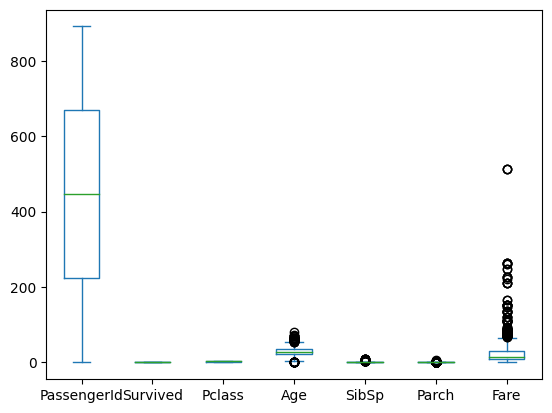

In [ ]:
df.plot(kind='box')

In [ ]:
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)

In [ ]:
df=df[(df['Age']>lower_bound)&(df['Age']<upper_bound)]

In [ ]:
q11=df['Fare'].quantile(0.25)
q33=df['Fare'].quantile(0.75)
iqr1=q33-q11
lower_bound1=q11-(1.5*iqr1)
upper_bound1=q33+(1.5*iqr1)

In [ ]:
df=df[(df['Fare']>lower_bound1)&(df['Fare']<upper_bound1)]

<Axes: >

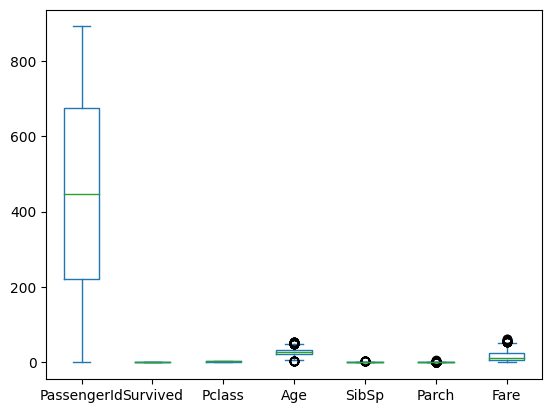

In [ ]:
df.plot(kind='box')

In [ ]:
x=df.drop(['Survived','Name','PassengerId','SibSp','Parch','Embarked'],axis=1)
y=df['Survived']

In [ ]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin'], dtype='object')

In [ ]:
x.shape,y.shape

((718, 6), (718,))

In [ ]:
le=LabelEncoder()
x['Sex']=le.fit_transform(x['Sex'])
x['Cabin']=le.fit_transform(x['Cabin'])
x['Ticket']=le.fit_transform(x['Ticket'])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
print(accuracy_score(y_test,y_pred1))

0.7916666666666666


In [ ]:
model2=SVC()
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
print(accuracy_score(y_test,y_pred2))


0.6944444444444444


In [ ]:
model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
print(accuracy_score(y_test,y_pred3))

0.7638888888888888


In [ ]:
model4=RandomForestClassifier()
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
print(accuracy_score(y_test,y_pred4))

0.7916666666666666


In [ ]:
print(classification_report(y_test,y_pred1))
print(classification_report(y_test,y_pred2))
print(classification_report(y_test,y_pred3))
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84        95
           1       0.70      0.67      0.69        49

    accuracy                           0.79       144
   macro avg       0.77      0.76      0.77       144
weighted avg       0.79      0.79      0.79       144

              precision    recall  f1-score   support

           0       0.69      0.99      0.81        95
           1       0.86      0.12      0.21        49

    accuracy                           0.69       144
   macro avg       0.77      0.56      0.51       144
weighted avg       0.74      0.69      0.61       144

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        95
           1       0.64      0.71      0.67        49

    accuracy                           0.76       144
   macro avg       0.74      0.75      0.74       144
weighted avg       0.77      0.76      0.77       144

              preci

In [ ]:
scaler=StandardScaler()
scaler.fit(x_train)


StandardScaler()

In [ ]:
input_data=(3,1,22,467,7.2500,73)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshaped)
print(std_data)

[[ 0.68952031  0.67590886 -0.62170533  0.99769137 -0.74085293  0.31913158]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
prediction=model4.predict(std_data)
if prediction[0]==0:
  print('Dead')
else:
  print('Survive')

Dead


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
